In [1]:
import numpy as np
import pandas as pd
import os
os.chdir('../../data/GosaiMPRA')

import sys
sys.path.append('/home/hxcai/cell_type_specific_CRE')

from utils import *
# from datasets import SeqInterval
from pyfaidx import Fasta

from Bio import pairwise2
from Bio.pairwise2 import format_alignment, align
import subprocess

/home/hxcai/anaconda3/envs/torch/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
genome = Fasta('/home/hxcai/genome/hg19.fa')
seq3 = genome['chr15'][89574340: 89574540].seq
seq3

'tcataaaggcagtgtagacccaaacagtgagcagtagcaagatttattacaaagagcgaaagaagaacgaaaccacatcgcaaaacggaactccagccggtttgccactactgcctcgggcagcctgcttttattctcttatctggccccacccacatcctgctgattggtccattttacagagagtggattggtccatt'

In [3]:
seq_reverse_complement(seq3)

'aatggaccaatccactctctgtaaaatggaccaatcagcaggatgtgggtggggccagataagagaataaaagcaggctgcccgaggcagtagtggcaaaccggctggagttccgttttgcgatgtggtttcgttcttctttcgctctttgtaataaatcttgctactgctcactgtttgggtctacactgcctttatga'

In [4]:
seq1 = 'CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTATTACAAAGAGCGAAAGAAGAACGAAACCACATCGCAAAACGGAACTCCAGCCGGTTGCCACTACTGCCTCGGGCAGCCTGCTTTTATTCTCTTATCTGGCCCCACCCACATCCTGCTGATTGGTCCATTTTACAGAGAGTGGATTGGTCCATTT'
seq2 = 'CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTATTACAAAGAGCGAAAGAAGAACGAAACCACATCGCAAAACGGAACTCCAGCCGGTTTGCCACTACTGCCTCGGGCAGCCTGCTTTTATTCTCTTATCTGGCCCCACCCACATCCTGCTGATTGGTCCATTTTACAGAGAGTGGATTGGTCCATTT'

In [5]:
alignments = align.globalms(seq1, seq2, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))

alignments = align.globalms(seq1, seq_reverse_complement(seq3), 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))

CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTATTACAAAGAGCGAAAGAAGAACGAAACCACATCGCAAAACGGAACTCCAGCCGGTT-GCCACTACTGCCTCGGGCAGCCTGCTTTTATTCTCTTATCTGGCCCCACCCACATCCTGCTGATTGGTCCATTTTACAGAGAGTGGATTGGTCCATTT
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTATTACAAAGAGCGAAAGAAGAACGAAACCACATCGCAAAACGGAACTCCAGCCGGTTTGCCACTACTGCCTCGGGCAGCCTGCTTTTATTCTCTTATCTGGCCCCACCCACATCCTGCTGATTGGTCCATTTTACAGAGAGTGGATTGGTCCATTT
  Score=397.5

CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTATTACAAAGAGCGAAAGAAGAACGAAACCACATCGCAAAACGGAACTCCAGCCGGTTGCCACTACTGCCTCGGGCAGCCTGCTTTTATTCTCTTATCTGGCCCCACCCACATCCTGCTGATTGGTCCATTTTACAGAGAGTGGATTGGTCCATTT-
.....................................................................................................................................................................................

In [6]:
# 12:63513920:G:A:A:wC  G->A
# 12:63513920:G:A:R:wC  G->G

# 2:145626403:A:C:R:wC  A->A
# 2:145626403:A:C:A:wC  A->C

# 第三个是A的话,替换
# 第三个是R的话,不变




print(genome['chr12'][63513920])
print(genome['chr12'][63513915:63513925])

seq1 = 'CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTTCATAAGAAATATTGATTCAATTTTTATGACTATGTAATTCTCATTTTTTTCAGATGCCATGTCAAAATATATTTGTTCCTCTTCTAGTTTTAGGATAATGAGACTGCTATGTGATATAACTACTTGGATGAATATTATCAGAAATCTAGATTTA'
seq2 = 'CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTTCATAAGAAATATTGATTCAATTTTTATGACTATGTAATTCTCATTTTTTTCAGGTGCCATGTCAAAATATATTTGTTCCTCTTCTAGTTTTAGGATAATGAGACTGCTATGTGATATAACTACTTGGATGAATATTATCAGAAATCTAGATTTA'
print(len(seq1), len(seq2))

T
TCAGGTGCCA
200 200


In [8]:
seq3 = genome['chr12'][63513820:63514020].seq
# seq3 = seq_reverse_complement(seq3)
alignments = align.globalms(seq1, seq2, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))
alignments = align.globalms(seq1, seq3, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))
alignments = align.globalms(seq2, seq3, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))

CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTTCATAAGAAATATTGATTCAATTTTTATGACTATGTAATTCTCATTTTTTTCAGATGCCATGTCAAAATATATTTGTTCCTCTTCTAGTTTTAGGATAATGAGACTGCTATGTGATATAACTACTTGGATGAATATTATCAGAAATCTAGATTTA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTTCATAAGAAATATTGATTCAATTTTTATGACTATGTAATTCTCATTTTTTTCAGGTGCCATGTCAAAATATATTTGTTCCTCTTCTAGTTTTAGGATAATGAGACTGCTATGTGATATAACTACTTGGATGAATATTATCAGAAATCTAGATTTA
  Score=398

CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTTCATAAGAAATATTGATTCAATTTTTATGACTATGTAATTCTCATTTTTTTCAGATGCCATGTCAAAATATATTTGTTCCTCTTCTAGTTTTAGGATAATGAGACTGCTATGTGATATAACTACTTGGATGAATATTATCAGAAATCTAGATTTA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [9]:
# 2:145626403:A:C:R:wC  A->A
# 2:145626403:A:C:A:wC  A->C

In [10]:
seq1 = 'CATAAAGGTAGACCATATGGTCTAGGAAGCAGAGGACAGCTCAGAAACAGAGAAGAACTGAACATATGTGCAAAGAAGAGAGGAGAGATGGGACAGAGAAGACAGACCTCATCTTTATAAGTTCTTGATTGCATCTTTTCCCTGAGACCTGGCCACATCCCTAGCCCTAGACTTCATGAGACAGCCCAGTATCTTTAAAA'
seq2 = 'CATAAAGGTAGACCATATGGTCTAGGAAGCAGAGGACAGCTCAGAAACAGAGAAGAACTGAACATATGTGCAAAGAAGAGAGGAGAGATGGGACAGAGACGACAGACCTCATCTTTATAAGTTCTTGATTGCATCTTTTCCCTGAGACCTGGCCACATCCCTAGCCCTAGACTTCATGAGACAGCCCAGTATCTTTAAAA'

In [11]:
seq3 = genome['chr2'][145626303: 145626503].seq
seq3

'CATAAAGGTAGACCATATGGTCTAGGAAGCAGAGGACAGCTCAGAAACAGAGAAGAACTGAACATATGTGCAAAGAAGAGAGGAGAGATGGGACAGAGAAGACAGACCTCATCTTTATAAGTTCTTGATTGCATCTTTTCCCTGAGACCTGGCCACATCCCTAGCCCTAGACTTCATGAGACAGCCCAGTATCTTTAAAA'

In [12]:
alignments = align.globalms(seq1, seq2, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))
alignments = align.globalms(seq1, seq3, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))
alignments = align.globalms(seq2, seq3, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))

CATAAAGGTAGACCATATGGTCTAGGAAGCAGAGGACAGCTCAGAAACAGAGAAGAACTGAACATATGTGCAAAGAAGAGAGGAGAGATGGGACAGAGAAGACAGACCTCATCTTTATAAGTTCTTGATTGCATCTTTTCCCTGAGACCTGGCCACATCCCTAGCCCTAGACTTCATGAGACAGCCCAGTATCTTTAAAA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
CATAAAGGTAGACCATATGGTCTAGGAAGCAGAGGACAGCTCAGAAACAGAGAAGAACTGAACATATGTGCAAAGAAGAGAGGAGAGATGGGACAGAGACGACAGACCTCATCTTTATAAGTTCTTGATTGCATCTTTTCCCTGAGACCTGGCCACATCCCTAGCCCTAGACTTCATGAGACAGCCCAGTATCTTTAAAA
  Score=398

CATAAAGGTAGACCATATGGTCTAGGAAGCAGAGGACAGCTCAGAAACAGAGAAGAACTGAACATATGTGCAAAGAAGAGAGGAGAGATGGGACAGAGAAGACAGACCTCATCTTTATAAGTTCTTGATTGCATCTTTTCCCTGAGACCTGGCCACATCCCTAGCCCTAGACTTCATGAGACAGCCCAGTATCTTTAAAA
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [13]:
# 7:4682252:T:TTTG:A:wC
# 7:4682252:T:TTTG:R:wC

seq1 = 'CATAAATAAATAAACGAATGGGGAGGAAATTGATAAAATATTAAAAGAGTGTTGTTTCAGAGTTTTTACTATGTCACCTCTTACAGATTTATGAGAGTTTGTTGTTGTTTTTTGGAGAAGAGGGGTCTCCCTATGTTACCCAGGCTGGTCTCAAACTCCTGGGCTCAATCCATCCGTCCGCCTCAGCCTCCTGAAGTGCT'
seq2 = 'CATAAATAAATAAACGAATGGGGAGGAAATTGATAAAATATTAAAAGAGTGTTGTTTCAGAGTTTTTACTATGTCACCTCTTACAGATTTATGAGAGTTTGTTGTTTTTTGGAGAAGAGGGGTCTCCCTATGTTACCCAGGCTGGTCTCAAACTCCTGGGCTCAATCCATCCGTCCGCCTCAGCCTCCTGAAGTGCT'
seq3 = genome['chr7'][4682152: 4682352].seq.upper()
print(len(seq1), len(seq2), len(seq3))

alignments = align.globalms(seq1, seq3, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))
alignments = align.globalms(seq2, seq3, 2, 0, -.5, -.1)
print(format_alignment(*alignments[0]))

200 197 200
--CATAAATAAATAAACGAATGGGGAGGAAATTGATAAAATATTAAAAGAGTGTTGTTTCAGAGTTTTTACTATGTCACCTCTTACAGATTTATGAGAGTTTGTTGTTGTTTTTTGGAGAAGAGGGGTCTCCCTATGTTACCCAGGCTGGTCTCAAACTCCTGGGCTCAATCCATCCGTCCGCCTCAGCCTCCTGAAGTGCT-
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||   ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||| 
TGCATAAATAAATAAACGAATGGGGAGGAAATTGATAAAATATTAAAAGAGTGTTGTTTCAGAGTTTTTACTATGTCACCTCTTACAGATTTATGAGAGT---TTGTTGTTTTTTGGAGAAGAGGGGTCTCCCTATGTTACCCAGGCTGGTCTCAAACTCCTGGGCTCAATCCATCCGTCCGCCTCAGCCTCCTGAAGTGCTA
  Score=392.2

--CATAAATAAATAAACGAATGGGGAGGAAATTGATAAAATATTAAAAGAGTGTTGTTTCAGAGTTTTTACTATGTCACCTCTTACAGATTTATGAGAGTTTGTTGTTTTTTGGAGAAGAGGGGTCTCCCTATGTTACCCAGGCTGGTCTCAAACTCCTGGGCTCAATCCATCCGTCCGCCTCAGCCTCCTGAAGTGCT-
  ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

In [3]:
df = pd.read_csv('supp_materials/SupTable 2 - UKBB_GTEX_CODA_averaged_no_cutoffs.txt', delimiter='\t', low_memory=False)
df.head()

,HepG2_mean,IDs,K562_mean,OL,SKNSH_mean,chr,class,ctrl_mean_hepg2,ctrl_mean_k562,ctrl_mean_sknsh,...,lfcSE_hepg2,lfcSE_k562,lfcSE_sknsh,nt_sequence,padj_hepg2,padj_k562,padj_sknsh,pvalue_hepg2,pvalue_k562,pvalue_sknsh
0,0.233601,7:70038969:G:T:A:wC,0.060779,29,0.047194,7,"BMI,BFP",1108.444552,1108.444552,1108.444552,...,0.118254,0.098795,0.130671,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,9.691479e-02,6.338905e-01,8.273912e-01,4.822018e-02,5.384208e-01,7.179756e-01
1,0.004565,1:192696196:C:T:A:wC,0.379639,33,-0.244395,1,Depression_GP,395.510507,395.510507,395.510507,...,0.186394,0.162169,0.118952,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,9.883817e-01,3.730610e-02,6.095871e-02,9.804590e-01,1.923156e-02,3.992017e-02
2,0.384537,1:211209457:C:T:A:wC,0.036707,33,-0.004578,1,CAD,943.663365,943.663365,943.663365,...,0.121640,0.098391,0.087458,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,5.069204e-03,7.842750e-01,9.681826e-01,1.570769e-03,7.090912e-01,9.582568e-01
3,4.106624,15:89574440:GT:G:A:wC,4.465352,33,2.869749,15,CAD,64.051812,64.051812,64.051812,...,0.140392,0.113868,0.163372,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,2.345249e-186,0.000000e+00,6.289672e-68,4.356875e-188,0.000000e+00,4.508310e-69
4,4.116494,15:89574440:GT:G:R:wC,4.508784,33,3.040183,15,CAD,27.731069,27.731069,27.731069,...,0.209049,0.157035,0.195014,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,6.007565e-85,5.394421e-180,9.960333e-54,2.547286e-86,2.711361e-181,8.571694e-55


In [4]:
df['hg19_pos'] = df['IDs'].str.split(':').str[1]

In [5]:
match_indices = []
genome = Fasta('/home/hxcai/genome/hg19.fa')

for i, row in tqdm(df.iterrows(), total=len(df)):
    IDs = row['IDs'].split(':')
    if len(IDs) >=5:
        if IDs[4] == 'R':
            # R means reference 和基因组相同
            if len(IDs[2]) == 1 and len(IDs[3]) == 1:
                # 单碱基替换
                chr = 'chr'+IDs[0]
                pos = int(IDs[1])
                genome_seq = genome[chr][pos-100:pos+100].seq.upper()
                data_seq = row['nt_sequence'].upper()
                if genome_seq == data_seq:
                    match_indices.append(i)
                else:
                    print(f'{i}, not match')

  1%|▏         | 10923/798064 [00:00<00:26, 29761.33it/s]

17, not match
40, not match
50, not match
165, not match
280, not match
286, not match
324, not match
326, not match
337, not match
339, not match
353, not match
435, not match
445, not match
458, not match
460, not match
487, not match
489, not match
528, not match
651, not match
658, not match
663, not match
665, not match
692, not match
694, not match
696, not match
697, not match
829, not match
844, not match
845, not match
932, not match
936, not match
937, not match
940, not match
942, not match
984, not match
1013, not match
1036, not match
1037, not match
1052, not match
1085, not match
1086, not match
1138, not match
1145, not match
1178, not match
1211, not match
1212, not match
1213, not match
1269, not match
1270, not match
1285, not match
1458, not match
1459, not match
1478, not match
1485, not match
1523, not match
1525, not match
1527, not match
1528, not match
1530, not match
1531, not match
1561, not match
1567, not match
1594, not match
1596, not match
1616, not matc

  3%|▎         | 21968/798064 [00:00<00:17, 43169.12it/s]

11019, not match
11022, not match
11085, not match
11087, not match
11089, not match
11094, not match
11095, not match
11122, not match
11138, not match
11159, not match
11161, not match
11237, not match
11239, not match
11240, not match
11256, not match
11270, not match
11273, not match
11420, not match
11427, not match
11429, not match
11442, not match
11457, not match
11458, not match
11461, not match
11468, not match
11568, not match
11586, not match
11641, not match
11642, not match
11712, not match
11739, not match
11740, not match
11747, not match
11863, not match
11898, not match
11899, not match
11916, not match
11917, not match
11952, not match
11957, not match
11982, not match
12044, not match
12052, not match
12056, not match
12057, not match
12061, not match
12086, not match
12088, not match
12107, not match
12108, not match
12109, not match
12123, not match
12124, not match
12167, not match
12174, not match
12178, not match
12179, not match
12182, not match
12219, not mat

  4%|▍         | 33057/798064 [00:00<00:15, 49534.45it/s]

22140, not match
22141, not match
22189, not match
22190, not match
22251, not match
22252, not match
22263, not match
22367, not match
22459, not match
22460, not match
22631, not match
22633, not match
22641, not match
22827, not match
22829, not match
22838, not match
22839, not match
22851, not match
22853, not match
22866, not match
22871, not match
22883, not match
22939, not match
22993, not match
22995, not match
23064, not match
23091, not match
23115, not match
23178, not match
23180, not match
23208, not match
23401, not match
23403, not match
23413, not match
23496, not match
23519, not match
23547, not match
23588, not match
23712, not match
23764, not match
23766, not match
23805, not match
23806, not match
23846, not match
24021, not match
24103, not match
24131, not match
24172, not match
24226, not match
24250, not match
24272, not match
24295, not match
24296, not match
24300, not match
24302, not match
24310, not match
24454, not match
24477, not match
24494, not mat

  6%|▌         | 44220/798064 [00:01<00:14, 52780.04it/s]

33296, not match
33336, not match
33337, not match
33420, not match
33421, not match
33455, not match
33456, not match
33483, not match
33515, not match
33517, not match
33519, not match
33538, not match
33540, not match
33560, not match
33570, not match
33572, not match
33613, not match
33614, not match
33686, not match
33694, not match
33741, not match
33927, not match
33929, not match
33932, not match
33952, not match
34164, not match
34191, not match
34257, not match
34259, not match
34371, not match
34373, not match
34375, not match
34377, not match
34392, not match
34393, not match
34398, not match
34399, not match
34543, not match
34550, not match
34552, not match
34614, not match
34683, not match
34685, not match
34787, not match
34789, not match
34825, not match
34843, not match
34844, not match
34890, not match
34891, not match
34897, not match
34987, not match
35002, not match
35003, not match
35004, not match
35005, not match
35009, not match
35011, not match
35012, not mat

  7%|▋         | 55333/798064 [00:01<00:13, 54235.89it/s]

44534, not match
44535, not match
44569, not match
44575, not match
44592, not match
44854, not match
44940, not match
44942, not match
44946, not match
44947, not match
45029, not match
45031, not match
45073, not match
45074, not match
45105, not match
45106, not match
45117, not match
45135, not match
45136, not match
45280, not match
45281, not match
45334, not match
45335, not match
45344, not match
45345, not match
45383, not match
45385, not match
45387, not match
45407, not match
45408, not match
45426, not match
45448, not match
45449, not match
45626, not match
45706, not match
45729, not match
45732, not match
45799, not match
45843, not match
45846, not match
45848, not match
45888, not match
45890, not match
45916, not match
45919, not match
45920, not match
45933, not match
46028, not match
46041, not match
46049, not match
46051, not match
46053, not match
46145, not match
46146, not match
46206, not match
46216, not match
46239, not match
46241, not match
46245, not mat

  8%|▊         | 66516/798064 [00:01<00:13, 55102.73it/s]

55704, not match
55705, not match
55722, not match
55735, not match
55736, not match
55737, not match
55827, not match
55878, not match
55880, not match
55900, not match
55901, not match
56004, not match
56045, not match
56046, not match
56047, not match
56105, not match
56107, not match
56161, not match
56168, not match
56273, not match
56275, not match
56347, not match
56348, not match
56382, not match
56394, not match
56528, not match
56596, not match
56614, not match
56713, not match
56760, not match
56761, not match
56777, not match
56779, not match
56894, not match
56895, not match
56909, not match
56910, not match
56965, not match
56967, not match
56991, not match
56992, not match
57094, not match
57115, not match
57116, not match
57155, not match
57216, not match
57218, not match
57226, not match
57282, not match
57283, not match
57328, not match
57329, not match
57381, not match
57398, not match
57578, not match
57579, not match
57635, not match
57637, not match
57639, not mat

 10%|▉         | 77622/798064 [00:01<00:13, 55203.77it/s]

66976, not match
66978, not match
66996, not match
66997, not match
67002, not match
67030, not match
67092, not match
67095, not match
67096, not match
67128, not match
67329, not match
67331, not match
67389, not match
67390, not match
67544, not match
67545, not match
67561, not match
67573, not match
67632, not match
67705, not match
67721, not match
67827, not match
67864, not match
67866, not match
67956, not match
67957, not match
67974, not match
67983, not match
67984, not match
68053, not match
68054, not match
68081, not match
68083, not match
68091, not match
68093, not match
68108, not match
68137, not match
68158, not match
68163, not match
68179, not match
68193, not match
68204, not match
68206, not match
68242, not match
68257, not match
68276, not match
68277, not match
68278, not match
68400, not match
68402, not match
68423, not match
68424, not match
68441, not match
68443, not match
68492, not match
68527, not match
68529, not match
68534, not match
68549, not mat

 11%|█         | 88662/798064 [00:01<00:13, 54385.17it/s]

78071, not match
78077, not match
78089, not match
78091, not match
78124, not match
78126, not match
78135, not match
78137, not match
78264, not match
78339, not match
78340, not match
78546, not match
78573, not match
78574, not match
78589, not match
78590, not match
78681, not match
78716, not match
78723, not match
78833, not match
78835, not match
78870, not match
78872, not match
78875, not match
78885, not match
78904, not match
78906, not match
78991, not match
78999, not match
79001, not match
79073, not match
79075, not match
79093, not match
79187, not match
79247, not match
79249, not match
79347, not match
79348, not match
79430, not match
79497, not match
79520, not match
79522, not match
79845, not match
79846, not match
79847, not match
79851, not match
79874, not match
79891, not match
79892, not match
79927, not match
79933, not match
79953, not match
79954, not match
80014, not match
80106, not match
80107, not match
80162, not match
80176, not match
80179, not mat

 12%|█▏        | 99701/798064 [00:02<00:12, 54809.51it/s]

88866, not match
88867, not match
88900, not match
88901, not match
88968, not match
88969, not match
88984, not match
88986, not match
89093, not match
89094, not match
89127, not match
89128, not match
89148, not match
89149, not match
89219, not match
89221, not match
89234, not match
89236, not match
89312, not match
89313, not match
89337, not match
89338, not match
89371, not match
89373, not match
89382, not match
89385, not match
89390, not match
89394, not match
89412, not match
89416, not match
89474, not match
89494, not match
89540, not match
89541, not match
89704, not match
89712, not match
89757, not match
89759, not match
89761, not match
89928, not match
89930, not match
89947, not match
89994, not match
89996, not match
90024, not match
90046, not match
90047, not match
90052, not match
90210, not match
90270, not match
90271, not match
90303, not match
90320, not match
90361, not match
90575, not match
90577, not match
90618, not match
90620, not match
90623, not mat

 14%|█▍        | 110720/798064 [00:02<00:12, 54948.71it/s]

100156, not match
100158, not match
100160, not match
100178, not match
100194, not match
100280, not match
100292, not match
100293, not match
100294, not match
100306, not match
100308, not match
100318, not match
100320, not match
100323, not match
100325, not match
100362, not match
100368, not match
100370, not match
100388, not match
100390, not match
100392, not match
100393, not match
100406, not match
100434, not match
100436, not match
100446, not match
100522, not match
100523, not match
100566, not match
100568, not match
100582, not match
100584, not match
100585, not match
100599, not match
100621, not match
100624, not match
100627, not match
100710, not match
100712, not match
100721, not match
100723, not match
100757, not match
100899, not match
100906, not match
100976, not match
100999, not match
101031, not match
101044, not match
101045, not match
101271, not match
101279, not match
101280, not match
101287, not match
101291, not match
101309, not match
101457, no

 15%|█▌        | 121714/798064 [00:02<00:12, 54164.25it/s]

111401, not match
111402, not match
111444, not match
111446, not match
111460, not match
111462, not match
111474, not match
111479, not match
111605, not match
111704, not match
111705, not match
111784, not match
111785, not match
111805, not match
111836, not match
111952, not match
111953, not match
111962, not match
111975, not match
111976, not match
112011, not match
112019, not match
112087, not match
112089, not match
112094, not match
112102, not match
112120, not match
112122, not match
112124, not match
112128, not match
112130, not match
112152, not match
112153, not match
112177, not match
112181, not match
112182, not match
112192, not match
112212, not match
112213, not match
112417, not match
112419, not match
112445, not match
112447, not match
112529, not match
112530, not match
112548, not match
112552, not match
112554, not match
112653, not match
112757, not match
112758, not match
112767, not match
112768, not match
112821, not match
112822, not match
112919, no

 17%|█▋        | 132559/798064 [00:02<00:12, 53895.91it/s]

122207, not match
122208, not match
122209, not match
122220, not match
122221, not match
122319, not match
122335, not match
122405, not match
122524, not match
122562, not match
122669, not match
122675, not match
122680, not match
122681, not match
122687, not match
122757, not match
122772, not match
122789, not match
122822, not match
122823, not match
122864, not match
122899, not match
122900, not match
122919, not match
122921, not match
122964, not match
122966, not match
123040, not match
123057, not match
123074, not match
123076, not match
123244, not match
123246, not match
123319, not match
123321, not match
123376, not match
123441, not match
123522, not match
123536, not match
123543, not match
123642, not match
123747, not match
123748, not match
123774, not match
123775, not match
123818, not match
123872, not match
124092, not match
124152, not match
124270, not match
124272, not match
124297, not match
124299, not match
124307, not match
124311, not match
124332, no

 18%|█▊        | 143366/798064 [00:02<00:12, 53751.21it/s]

133004, not match
133007, not match
133029, not match
133031, not match
133050, not match
133080, not match
133112, not match
133117, not match
133118, not match
133179, not match
133204, not match
133207, not match
133453, not match
133470, not match
133492, not match
133493, not match
133510, not match
133513, not match
133515, not match
133524, not match
133526, not match
133642, not match
133644, not match
133688, not match
133690, not match
133799, not match
133822, not match
133826, not match
133856, not match
133858, not match
133862, not match
133865, not match
133867, not match
133869, not match
133905, not match
133913, not match
133967, not match
134001, not match
134003, not match
134004, not match
134020, not match
134022, not match
134050, not match
134067, not match
134083, not match
134095, not match
134097, not match
134122, not match
134156, not match
134158, not match
134183, not match
134195, not match
134332, not match
134334, not match
134361, not match
134366, no

 19%|█▉        | 154314/798064 [00:03<00:11, 54267.19it/s]

143966, not match
143968, not match
143969, not match
143970, not match
143973, not match
143974, not match
144022, not match
144024, not match
144194, not match
144197, not match
144198, not match
144211, not match
144233, not match
144234, not match
144240, not match
144243, not match
144245, not match
144249, not match
144260, not match
144261, not match
144270, not match
144317, not match
144359, not match
144361, not match
144413, not match
144439, not match
144440, not match
144502, not match
144617, not match
144618, not match
144684, not match
144759, not match
144760, not match
144767, not match
144850, not match
144854, not match
144855, not match
144886, not match
144887, not match
144907, not match
144909, not match
144913, not match
144954, not match
144998, not match
145014, not match
145069, not match
145088, not match
145106, not match
145108, not match
145166, not match
145281, not match
145319, not match
145381, not match
145382, not match
145456, not match
145458, no

 21%|██        | 165313/798064 [00:03<00:11, 54689.63it/s]

154966, not match
155031, not match
155049, not match
155051, not match
155094, not match
155109, not match
155111, not match
155141, not match
155143, not match
155345, not match
155417, not match
155419, not match
155489, not match
155491, not match
155496, not match
155497, not match
155500, not match
155501, not match
155562, not match
155563, not match
155572, not match
155580, not match
155582, not match
155601, not match
155605, not match
155606, not match
155622, not match
155623, not match
155624, not match
155644, not match
155657, not match
155659, not match
155681, not match
155682, not match
155740, not match
155756, not match
155809, not match
155811, not match
155829, not match
155830, not match
155844, not match
155846, not match
155879, not match
155880, not match
155906, not match
156026, not match
156080, not match
156082, not match
156119, not match
156121, not match
156166, not match
156188, not match
156199, not match
156202, not match
156222, not match
156224, no

 22%|██▏       | 176242/798064 [00:03<00:11, 54464.70it/s]

166008, not match
166012, not match
166014, not match
166042, not match
166043, not match
166049, not match
166052, not match
166054, not match
166065, not match
166071, not match
166114, not match
166116, not match
166157, not match
166158, not match
166172, not match
166173, not match
166200, not match
166225, not match
166231, not match
166233, not match
166278, not match
166334, not match
166335, not match
166343, not match
166345, not match
166458, not match
166460, not match
166498, not match
166559, not match
166576, not match
166593, not match
166594, not match
166621, not match
166627, not match
166630, not match
166637, not match
166733, not match
166734, not match
166803, not match
166938, not match
166940, not match
166942, not match
167015, not match
167017, not match
167060, not match
167062, not match
167136, not match
167163, not match
167206, not match
167247, not match
167248, not match
167251, not match
167273, not match
167282, not match
167290, not match
167304, no

 23%|██▎       | 187133/798064 [00:03<00:11, 54314.68it/s]

176933, not match
176934, not match
176965, not match
176996, not match
176999, not match
177001, not match
177021, not match
177054, not match
177055, not match
177077, not match
177078, not match
177107, not match
177116, not match
177118, not match
177120, not match
177129, not match
177153, not match
177157, not match
177206, not match
177209, not match
177213, not match
177245, not match
177246, not match
177356, not match
177357, not match
177372, not match
177442, not match
177447, not match
177449, not match
177453, not match
177459, not match
177569, not match
177669, not match
177794, not match
177795, not match
177797, not match
177809, not match
177811, not match
177812, not match
177837, not match
177854, not match
177880, not match
177881, not match
177924, not match
178027, not match
178087, not match
178088, not match
178123, not match
178124, not match
178144, not match
178258, not match
178259, not match
178312, not match
178354, not match
178355, not match
178465, no

 25%|██▍       | 198132/798064 [00:03<00:10, 54620.92it/s]

187909, not match
187911, not match
187918, not match
187922, not match
187936, not match
187947, not match
187949, not match
188005, not match
188006, not match
188022, not match
188042, not match
188043, not match
188068, not match
188133, not match
188134, not match
188155, not match
188211, not match
188226, not match
188271, not match
188273, not match
188303, not match
188429, not match
188446, not match
188447, not match
188482, not match
188483, not match
188500, not match
188501, not match
188504, not match
188505, not match
188533, not match
188628, not match
188630, not match
188632, not match
188657, not match
188658, not match
188672, not match
188674, not match
188678, not match
188679, not match
188685, not match
188726, not match
188727, not match
188728, not match
188743, not match
188766, not match
188795, not match
188803, not match
188820, not match
188891, not match
188893, not match
188956, not match
188957, not match
189064, not match
189095, not match
189097, no

 26%|██▌       | 209135/798064 [00:04<00:10, 54838.83it/s]

198971, not match
198973, not match
198983, not match
199108, not match
199109, not match
199194, not match
199230, not match
199236, not match
199253, not match
199256, not match
199266, not match
199312, not match
199313, not match
199470, not match
199472, not match
199474, not match
199613, not match
199615, not match
199619, not match
199621, not match
199702, not match
199821, not match
199822, not match
199946, not match
199948, not match
199960, not match
199961, not match
200046, not match
200085, not match
200087, not match
200100, not match
200122, not match
200224, not match
200226, not match
200248, not match
200249, not match
200256, not match
200380, not match
200402, not match
200404, not match
200517, not match
200518, not match
200581, not match
200583, not match
200603, not match
200608, not match
200610, not match
200616, not match
200617, not match
200618, not match
200639, not match
200660, not match
200661, not match
200666, not match
200741, not match
200751, no

 28%|██▊       | 220273/798064 [00:04<00:10, 55279.06it/s]

210043, not match
210046, not match
210047, not match
210239, not match
210269, not match
210270, not match
210306, not match
210318, not match
210329, not match
210480, not match
210534, not match
210537, not match
210539, not match
210545, not match
210546, not match
210558, not match
210592, not match
210650, not match
210662, not match
210663, not match
210693, not match
210694, not match
210717, not match
210761, not match
210779, not match
210869, not match
210870, not match
210872, not match
210925, not match
210937, not match
210939, not match
210940, not match
210942, not match
210978, not match
211040, not match
211100, not match
211105, not match
211178, not match
211180, not match
211233, not match
211244, not match
211253, not match
211257, not match
211276, not match
211283, not match
211286, not match
211295, not match
211437, not match
211447, not match
211448, not match
211453, not match
211534, not match
211568, not match
211590, not match
211592, not match
211629, no

 29%|██▉       | 231382/798064 [00:04<00:10, 55425.67it/s]

221208, not match
221262, not match
221263, not match
221264, not match
221356, not match
221363, not match
221382, not match
221383, not match
221400, not match
221402, not match
221463, not match
221474, not match
221521, not match
221529, not match
221542, not match
221588, not match
221589, not match
221608, not match
221609, not match
221699, not match
221700, not match
221707, not match
221745, not match
221897, not match
221899, not match
221981, not match
221992, not match
221993, not match
222076, not match
222104, not match
222106, not match
222108, not match
222119, not match
222141, not match
222268, not match
222270, not match
222335, not match
222337, not match
222482, not match
222484, not match
222495, not match
222497, not match
222499, not match
222500, not match
222502, not match
222594, not match
222646, not match
222648, not match
222864, not match
222881, not match
222902, not match
222903, not match
222930, not match
222957, not match
222958, not match
222978, no

 30%|███       | 242522/798064 [00:04<00:09, 55565.83it/s]

232509, not match
232568, not match
232585, not match
232586, not match
232625, not match
232627, not match
232628, not match
232650, not match
232660, not match
232661, not match
232781, not match
232782, not match
232785, not match
232827, not match
232828, not match
232873, not match
232906, not match
232947, not match
233110, not match
233112, not match
233114, not match
233116, not match
233118, not match
233160, not match
233162, not match
233211, not match
233217, not match
233233, not match
233234, not match
233235, not match
233270, not match
233272, not match
233319, not match
233321, not match
233335, not match
233336, not match
233373, not match
233376, not match
233386, not match
233404, not match
233405, not match
233472, not match
233474, not match
233572, not match
233573, not match
233592, not match
233599, not match
233647, not match
233728, not match
233730, not match
233913, not match
233920, not match
233931, not match
233952, not match
233953, not match
233989, no

 32%|███▏      | 253555/798064 [00:04<00:10, 54446.64it/s]

243654, not match
243701, not match
243712, not match
243721, not match
243727, not match
243728, not match
243729, not match
243766, not match
243767, not match
243768, not match
243769, not match
243771, not match
243837, not match
243838, not match
243937, not match
243993, not match
244002, not match
244004, not match
244047, not match
244098, not match
244103, not match
244116, not match
244216, not match
244321, not match
244322, not match
244386, not match
244451, not match
244452, not match
244465, not match
244467, not match
244479, not match
244484, not match
244552, not match
244554, not match
244683, not match
244685, not match
244687, not match
244736, not match
244753, not match
244759, not match
244775, not match
244797, not match
244816, not match
244817, not match
244838, not match
244872, not match
244873, not match
244954, not match
244956, not match
244985, not match
244993, not match
245085, not match
245087, not match
245109, not match
245112, not match
245150, no

 33%|███▎      | 264436/798064 [00:05<00:09, 54088.02it/s]

254349, not match
254350, not match
254351, not match
254383, not match
254395, not match
254397, not match
254399, not match
254432, not match
254434, not match
254436, not match
254497, not match
254498, not match
254523, not match
254524, not match
254539, not match
254540, not match
254578, not match
254620, not match
254622, not match
254646, not match
254695, not match
254696, not match
254697, not match
254740, not match
254741, not match
254755, not match
254757, not match
254772, not match
254783, not match
254829, not match
254921, not match
254924, not match
255111, not match
255112, not match
255115, not match
255129, not match
255130, not match
255183, not match
255209, not match
255210, not match
255251, not match
255253, not match
255291, not match
255292, not match
255303, not match
255304, not match
255554, not match
255651, not match
255652, not match
255661, not match
255727, not match
255729, not match
255743, not match
255755, not match
255756, not match
255760, no

 35%|███▍      | 275438/798064 [00:05<00:09, 54531.00it/s]

265284, not match
265285, not match
265355, not match
265356, not match
265405, not match
265431, not match
265441, not match
265489, not match
265513, not match
265527, not match
265536, not match
265538, not match
265558, not match
265559, not match
265578, not match
265579, not match
265687, not match
265691, not match
265729, not match
265730, not match
265731, not match
265908, not match
266018, not match
266040, not match
266042, not match
266078, not match
266100, not match
266101, not match
266155, not match
266157, not match
266159, not match
266175, not match
266181, not match
266291, not match
266293, not match
266404, not match
266458, not match
266459, not match
266535, not match
266537, not match
266581, not match
266595, not match
266596, not match
266607, not match
266608, not match
266612, not match
266693, not match
266695, not match
266710, not match
266712, not match
266726, not match
266728, not match
266749, not match
266847, not match
266899, not match
266901, no

 36%|███▌      | 286378/798064 [00:05<00:09, 54490.91it/s]

276342, not match
276382, not match
276449, not match
276450, not match
276454, not match
276456, not match
276537, not match
276610, not match
276611, not match
276644, not match
276645, not match
276646, not match
276813, not match
276814, not match
276999, not match
277001, not match
277047, not match
277048, not match
277123, not match
277125, not match
277176, not match
277241, not match
277242, not match
277244, not match
277255, not match
277352, not match
277354, not match
277356, not match
277357, not match
277370, not match
277377, not match
277409, not match
277502, not match
277504, not match
277571, not match
277572, not match
277589, not match
277592, not match
277598, not match
277614, not match
277628, not match
277630, not match
277632, not match
277702, not match
277703, not match
277712, not match
277714, not match
277733, not match
277734, not match
277803, not match
277826, not match
277828, not match
277835, not match
277852, not match
277895, not match
277896, no

 37%|███▋      | 297489/798064 [00:05<00:09, 55051.05it/s]

287295, not match
287297, not match
287375, not match
287377, not match
287437, not match
287438, not match
287447, not match
287448, not match
287485, not match
287530, not match
287532, not match
287538, not match
287550, not match
287552, not match
287609, not match
287610, not match
287644, not match
287645, not match
287648, not match
287650, not match
287664, not match
287666, not match
287716, not match
287717, not match
287731, not match
287733, not match
287770, not match
287787, not match
287788, not match
287807, not match
287855, not match
287898, not match
287900, not match
288014, not match
288034, not match
288035, not match
288040, not match
288041, not match
288051, not match
288052, not match
288082, not match
288083, not match
288087, not match
288140, not match
288201, not match
288236, not match
288238, not match
288289, not match
288305, not match
288316, not match
288317, not match
288324, not match
288326, not match
288476, not match
288478, not match
288601, no

 39%|███▊      | 308501/798064 [00:05<00:08, 55033.66it/s]

298475, not match
298507, not match
298509, not match
298531, not match
298533, not match
298576, not match
298577, not match
298670, not match
298671, not match
298675, not match
298697, not match
298699, not match
298725, not match
298805, not match
298909, not match
298954, not match
298965, not match
298983, not match
298986, not match
299093, not match
299102, not match
299104, not match
299116, not match
299127, not match
299128, not match
299133, not match
299134, not match
299160, not match
299199, not match
299201, not match
299231, not match
299238, not match
299242, not match
299261, not match
299290, not match
299295, not match
299297, not match
299542, not match
299543, not match
299577, not match
299579, not match
299605, not match
299608, not match
299706, not match
299707, not match
299959, not match
299961, not match
300009, not match
300011, not match
300056, not match
300076, not match
300077, not match
300078, not match
300324, not match
300325, not match
300347, no

 40%|████      | 319508/798064 [00:06<00:08, 54828.01it/s]

309575, not match
309576, not match
309581, not match
309583, not match
309663, not match
309664, not match
309733, not match
309734, not match
309834, not match
309857, not match
309885, not match
309918, not match
309936, not match
310056, not match
310375, not match
310473, not match
310566, not match
310677, not match
310681, not match
310703, not match
310704, not match
310825, not match
310827, not match
310828, not match
310848, not match
310850, not match
310871, not match
310881, not match
310892, not match
310909, not match
310930, not match
311055, not match
311071, not match
311097, not match
311173, not match
311252, not match
311258, not match
311287, not match
311289, not match
311358, not match
311359, not match
311377, not match
311378, not match
311395, not match
311398, not match
311399, not match
311541, not match
311544, not match
311630, not match
311631, not match
311657, not match
311708, not match
311740, not match
311742, not match
311836, not match
311837, no

 41%|████▏     | 330459/798064 [00:06<00:08, 54329.70it/s]

320616, not match
320711, not match
320716, not match
320734, not match
320735, not match
320742, not match
320759, not match
320761, not match
320767, not match
320769, not match
320796, not match
320797, not match
320802, not match
320827, not match
320893, not match
320900, not match
320901, not match
320907, not match
320926, not match
320932, not match
320944, not match
320945, not match
320969, not match
321078, not match
321080, not match
321158, not match
321168, not match
321169, not match
321223, not match
321225, not match
321227, not match
321231, not match
321233, not match
321235, not match
321258, not match
321260, not match
321287, not match
321291, not match
321296, not match
321436, not match
321487, not match
321497, not match
321613, not match
321615, not match
321631, not match
321659, not match
321662, not match
321709, not match
321721, not match
321723, not match
321725, not match
321727, not match
321760, not match
321761, not match
321763, not match
321774, no

 43%|████▎     | 341306/798064 [00:06<00:08, 54045.62it/s]

331420, not match
331422, not match
331485, not match
331491, not match
331544, not match
331575, not match
331595, not match
331597, not match
331639, not match
331640, not match
331642, not match
331715, not match
331717, not match
331818, not match
331819, not match
331822, not match
331823, not match
331917, not match
331929, not match
331930, not match
331940, not match
331960, not match
331963, not match
331964, not match
331977, not match
332014, not match
332015, not match
332051, not match
332053, not match
332086, not match
332204, not match
332205, not match
332242, not match
332283, not match
332376, not match
332377, not match
332402, not match
332409, not match
332427, not match
332458, not match
332459, not match
332479, not match
332507, not match
332508, not match
332549, not match
332550, not match
332551, not match
332790, not match
332842, not match
332844, not match
332963, not match
333014, not match
333015, not match
333022, not match
333024, not match
333026, no

 44%|████▍     | 352158/798064 [00:06<00:08, 53905.45it/s]

342207, not match
342225, not match
342286, not match
342287, not match
342290, not match
342293, not match
342317, not match
342318, not match
342371, not match
342375, not match
342376, not match
342396, not match
342486, not match
342487, not match
342496, not match
342497, not match
342517, not match
342543, not match
342685, not match
342686, not match
342720, not match
342721, not match
342948, not match
342949, not match
342956, not match
342957, not match
342995, not match
343095, not match
343097, not match
343113, not match
343115, not match
343152, not match
343174, not match
343180, not match
343199, not match
343201, not match
343221, not match
343222, not match
343266, not match
343355, not match
343357, not match
343358, not match
343366, not match
343369, not match
343371, not match
343483, not match
343485, not match
343512, not match
343538, not match
343805, not match
343830, not match
343867, not match
343875, not match
343886, not match
343985, not match
343987, no

 45%|████▌     | 363000/798064 [00:06<00:08, 54066.69it/s]

353090, not match
353091, not match
353157, not match
353158, not match
353466, not match
353508, not match
353521, not match
353523, not match
353559, not match
353568, not match
353617, not match
353641, not match
353642, not match
353689, not match
353690, not match
353724, not match
353725, not match
353774, not match
353776, not match
353788, not match
353789, not match
353803, not match
353819, not match
353851, not match
353868, not match
353870, not match
353873, not match
353877, not match
353879, not match
353881, not match
353882, not match
353883, not match
353884, not match
353893, not match
353923, not match
353927, not match
353937, not match
353938, not match
353967, not match
353983, not match
353985, not match
353987, not match
353995, not match
353998, not match
353999, not match
354026, not match
354027, not match
354028, not match
354029, not match
354030, not match
354041, not match
354067, not match
354068, not match
354069, not match
354081, not match
354083, no

 47%|████▋     | 373878/798064 [00:07<00:07, 54068.15it/s]

364130, not match
364131, not match
364134, not match
364143, not match
364268, not match
364270, not match
364279, not match
364280, not match
364281, not match
364307, not match
364308, not match
364326, not match
364328, not match
364358, not match
364359, not match
364440, not match
364441, not match
364474, not match
364511, not match
364586, not match
364590, not match
364598, not match
364642, not match
364667, not match
364668, not match
364675, not match
364677, not match
364713, not match
364714, not match
364715, not match
364716, not match
364733, not match
364755, not match
364756, not match
364796, not match
364797, not match
364839, not match
364909, not match
364910, not match
364954, not match
364956, not match
364971, not match
364973, not match
364981, not match
364988, not match
364989, not match
364990, not match
365085, not match
365092, not match
365093, not match
365094, not match
365112, not match
365131, not match
365145, not match
365147, not match
365167, no

 48%|████▊     | 384692/798064 [00:07<00:07, 53873.45it/s]

375112, not match
375123, not match
375409, not match
375410, not match
375431, not match
375432, not match
375655, not match
375657, not match
375663, not match
375665, not match
375667, not match
375776, not match
375819, not match
375821, not match
375858, not match
375866, not match
376005, not match
376007, not match
376058, not match
376061, not match
376102, not match
376103, not match
376104, not match
376160, not match
376162, not match
376228, not match
376230, not match
376319, not match
376354, not match
376375, not match
376691, not match
376692, not match
376716, not match
376793, not match
376824, not match
376825, not match
376826, not match
376854, not match
376856, not match
376930, not match
376931, not match
377149, not match
377280, not match
377290, not match
377291, not match
377292, not match
377556, not match
377662, not match
377678, not match
377681, not match
377706, not match
377740, not match
377741, not match
377754, not match
377756, not match
377758, no

 50%|████▉     | 395543/798064 [00:07<00:07, 54068.42it/s]

386021, not match
386023, not match
386042, not match
386043, not match
386070, not match
386072, not match
386117, not match
386119, not match
386278, not match
386280, not match
386294, not match
386308, not match
386333, not match
386335, not match
386367, not match
386445, not match
386446, not match
386519, not match
386525, not match
386529, not match
386531, not match
386542, not match
386557, not match
386578, not match
386579, not match
386651, not match
386652, not match
386653, not match
386658, not match
386659, not match
386743, not match
386744, not match
386780, not match
386895, not match
386909, not match
386943, not match
386951, not match
386983, not match
387004, not match
387007, not match
387009, not match
387149, not match
387163, not match
387164, not match
387167, not match
387169, not match
387222, not match
387224, not match
387234, not match
387340, not match
387382, not match
387420, not match
387421, not match
387451, not match
387453, not match
387488, no

 51%|█████     | 406449/798064 [00:07<00:07, 54303.60it/s]

397146, not match
397201, not match
397203, not match
397212, not match
397213, not match
397237, not match
397308, not match
397320, not match
397325, not match
397327, not match
397341, not match
397427, not match
397429, not match
397489, not match
397491, not match
397496, not match
397513, not match
397591, not match
397592, not match
397631, not match
397663, not match
397665, not match
397670, not match
397671, not match
397676, not match
397693, not match
397715, not match
397717, not match
397726, not match
397730, not match
397732, not match
397749, not match
397751, not match
397808, not match
397809, not match
397810, not match
397966, not match
398000, not match
398002, not match
398009, not match
398010, not match
398080, not match
398082, not match
398083, not match
398108, not match
398230, not match
398232, not match
398285, not match
398286, not match
398305, not match
398307, not match
398329, not match
398330, not match
398382, not match
398438, not match
398440, no

 52%|█████▏    | 417380/798064 [00:07<00:06, 54464.87it/s]

408125, not match
408126, not match
408177, not match
408206, not match
408207, not match
408244, not match
408302, not match
408303, not match
408316, not match
408318, not match
408392, not match
408393, not match
408421, not match
408423, not match
408424, not match
408456, not match
408507, not match
408509, not match
408574, not match
408575, not match
408628, not match
408630, not match
408660, not match
408678, not match
408679, not match
408740, not match
408742, not match
408743, not match
408744, not match
408797, not match
408799, not match
408811, not match
408813, not match
408815, not match
408846, not match
408847, not match
408849, not match
408856, not match
408866, not match
408885, not match
408886, not match
408887, not match
408889, not match
408890, not match
408891, not match
408893, not match
408979, not match
408980, not match
409119, not match
409120, not match
409136, not match
409139, not match
409197, not match
409198, not match
409268, not match
409269, no

 54%|█████▎    | 428272/798064 [00:08<00:06, 54407.18it/s]

419126, not match
419127, not match
419164, not match
419166, not match
419168, not match
419184, not match
419203, not match
419238, not match
419253, not match
419261, not match
419280, not match
419399, not match
419401, not match
419404, not match
419416, not match
419418, not match
419419, not match
419434, not match
419436, not match
419551, not match
419554, not match
419574, not match
419601, not match
419603, not match
419637, not match
419685, not match
419801, not match
419802, not match
419834, not match
419835, not match
419946, not match
420001, not match
420002, not match
420003, not match
420030, not match
420042, not match
420045, not match
420050, not match
420103, not match
420105, not match
420125, not match
420151, not match
420152, not match
420164, not match
420194, not match
420196, not match
420210, not match
420211, not match
420265, not match
420266, not match
420271, not match
420275, not match
420387, not match
420388, not match
420411, not match
420455, no

 55%|█████▌    | 439185/798064 [00:08<00:06, 54383.21it/s]

430036, not match
430038, not match
430040, not match
430065, not match
430077, not match
430130, not match
430199, not match
430201, not match
430203, not match
430331, not match
430434, not match
430436, not match
430461, not match
430552, not match
430554, not match
430686, not match
430688, not match
430707, not match
430714, not match
430823, not match
430834, not match
430843, not match
430947, not match
431035, not match
431037, not match
431139, not match
431141, not match
431153, not match
431155, not match
431200, not match
431201, not match
431311, not match
431357, not match
431358, not match
431367, not match
431370, not match
431428, not match
431429, not match
431477, not match
431562, not match
431695, not match
431929, not match
431951, not match
432053, not match
432078, not match
432080, not match
432121, not match
432143, not match
432232, not match
432234, not match
432240, not match
432445, not match
432531, not match
432546, not match
432762, not match
432764, no

 56%|█████▋    | 450120/798064 [00:08<00:06, 53968.42it/s]

441071, not match
441090, not match
441288, not match
441312, not match
441328, not match
441333, not match
441335, not match
441345, not match
441412, not match
441413, not match
441589, not match
441617, not match
441643, not match
441750, not match
441783, not match
441784, not match
441939, not match
441948, not match
441949, not match
442161, not match
442163, not match
442208, not match
442231, not match
442428, not match
442430, not match
442432, not match
442583, not match
442585, not match
442587, not match
442686, not match
443022, not match
443034, not match
443129, not match
443130, not match
443131, not match
443132, not match
443491, not match
443617, not match
443619, not match
443621, not match
443625, not match
443676, not match
443734, not match
443736, not match
443754, not match
443779, not match
443943, not match
443962, not match
444153, not match
444155, not match
444170, not match
444234, not match
444327, not match
444329, not match
444524, not match
444863, no

 58%|█████▊    | 460923/798064 [00:08<00:06, 53942.88it/s]

451870, not match
451872, not match
451881, not match
451898, not match
451905, not match
451906, not match
451925, not match
451940, not match
451942, not match
451943, not match
451948, not match
451983, not match
451985, not match
452107, not match
452174, not match
452201, not match
452217, not match
452221, not match
452223, not match
452244, not match
452342, not match
452346, not match
452391, not match
452396, not match
452398, not match
452400, not match
452513, not match
452515, not match
452534, not match
452559, not match
452580, not match
452593, not match
452598, not match
452599, not match
452607, not match
452613, not match
452622, not match
452655, not match
452670, not match
452672, not match
452794, not match
452803, not match
452846, not match
452849, not match
452850, not match
452856, not match
452857, not match
452879, not match
452890, not match
452891, not match
452908, not match
452910, not match
452912, not match
452914, not match
452928, not match
452955, no

 59%|█████▉    | 471712/798064 [00:08<00:06, 53524.64it/s]

462702, not match
462704, not match
462713, not match
462715, not match
462718, not match
462735, not match
462736, not match
462743, not match
462744, not match
462745, not match
462750, not match
462757, not match
462759, not match
462764, not match
462768, not match
462798, not match
462809, not match
462810, not match
462811, not match
462813, not match
462832, not match
462833, not match
462841, not match
462886, not match
462902, not match
462943, not match
462945, not match
462954, not match
462955, not match
462956, not match
462959, not match
462960, not match
462961, not match
462962, not match
462970, not match
462971, not match
463072, not match
463183, not match
463184, not match
463307, not match
463327, not match
463407, not match
463540, not match
463573, not match
463633, not match
463638, not match
463736, not match
463738, not match
463753, not match
463758, not match
464135, not match
464156, not match
464209, not match
464211, not match
464226, not match
464227, no

 60%|██████    | 482475/798064 [00:09<00:05, 53444.08it/s]

473450, not match
473452, not match
473456, not match
473458, not match
473526, not match
473527, not match
473532, not match
473548, not match
473578, not match
473582, not match
473584, not match
473655, not match
473657, not match
473709, not match
473710, not match
473746, not match
473774, not match
473776, not match
473816, not match
473818, not match
473958, not match
473959, not match
473997, not match
474042, not match
474245, not match
474246, not match
474258, not match
474267, not match
474268, not match
474323, not match
474355, not match
474375, not match
474394, not match
474395, not match
474405, not match
474488, not match
474531, not match
474539, not match
474547, not match
474549, not match
474550, not match
474560, not match
474638, not match
474640, not match
474642, not match
474677, not match
474893, not match
474894, not match
474977, not match
474979, not match
474981, not match
474983, not match
475031, not match
475033, not match
475035, not match
475078, no

 62%|██████▏   | 493331/798064 [00:09<00:05, 53827.76it/s]

484201, not match
484202, not match
484218, not match
484219, not match
484220, not match
484222, not match
484255, not match
484269, not match
484271, not match
484293, not match
484298, not match
484310, not match
484332, not match
484341, not match
484342, not match
484343, not match
484349, not match
484350, not match
484369, not match
484372, not match
484373, not match
484382, not match
484384, not match
484406, not match
484408, not match
484440, not match
484447, not match
484465, not match
484467, not match
484504, not match
484506, not match
484601, not match
484608, not match
484609, not match
484633, not match
484686, not match
484699, not match
484700, not match
484747, not match
484749, not match
484768, not match
484789, not match
484791, not match
484808, not match
484823, not match
484825, not match
484834, not match
484836, not match
484837, not match
484838, not match
484839, not match
484846, not match
484859, not match
484861, not match
484894, not match
484895, no

 63%|██████▎   | 504117/798064 [00:09<00:05, 53825.96it/s]

495124, not match
495126, not match
495243, not match
495244, not match
495259, not match
495260, not match
495274, not match
495275, not match
495289, not match
495294, not match
495296, not match
495308, not match
495313, not match
495335, not match
495359, not match
495364, not match
495365, not match
495377, not match
495412, not match
495413, not match
495420, not match
495498, not match
495525, not match
495527, not match
495529, not match
495537, not match
495592, not match
495624, not match
495626, not match
495637, not match
495645, not match
495659, not match
495671, not match
495674, not match
495698, not match
495700, not match
495708, not match
495735, not match
495756, not match
495779, not match
495780, not match
495797, not match
495799, not match
495853, not match
495908, not match
495909, not match
496046, not match
496091, not match
496096, not match
496097, not match
496099, not match
496124, not match
496226, not match
496276, not match
496281, not match
496308, no

 65%|██████▍   | 514882/798064 [00:09<00:05, 53584.65it/s]

506041, not match
506064, not match
506102, not match
506284, not match
506285, not match
506293, not match
506294, not match
506312, not match
506316, not match
506540, not match
506583, not match
506584, not match
506591, not match
506639, not match
506684, not match
506753, not match
506800, not match
506849, not match
506851, not match
506895, not match
506896, not match
506913, not match
506914, not match
507030, not match
507157, not match
507271, not match
507329, not match
507330, not match
507363, not match
507430, not match
507440, not match
507488, not match
507506, not match
507562, not match
507564, not match
507658, not match
507726, not match
507728, not match
507882, not match
507883, not match
507920, not match
507922, not match
507926, not match
507970, not match
507972, not match
507974, not match
508065, not match
508066, not match
508075, not match
508076, not match
508102, not match
508180, not match
508181, not match
508218, not match
508244, not match
508361, no

 66%|██████▌   | 525742/798064 [00:09<00:05, 53992.08it/s]

516808, not match
516809, not match
516877, not match
516879, not match
516898, not match
516903, not match
516922, not match
516924, not match
516926, not match
516962, not match
516964, not match
516976, not match
517059, not match
517061, not match
517067, not match
517073, not match
517075, not match
517077, not match
517078, not match
517192, not match
517193, not match
517273, not match
517303, not match
517305, not match
517413, not match
517414, not match
517437, not match
517439, not match
517447, not match
517449, not match
517450, not match
517452, not match
517512, not match
517521, not match
517594, not match
517595, not match
517833, not match
517835, not match
517929, not match
517965, not match
517967, not match
517968, not match
517970, not match
517972, not match
518003, not match
518048, not match
518113, not match
518131, not match
518132, not match
518136, not match
518261, not match
518263, not match
518278, not match
518283, not match
518284, not match
518298, no

 67%|██████▋   | 536604/798064 [00:10<00:04, 54062.44it/s]

527876, not match
527894, not match
527918, not match
527919, not match
527924, not match
528008, not match
528016, not match
528118, not match
528284, not match
528285, not match
528364, not match
528388, not match
528389, not match
528597, not match
528598, not match
528621, not match
528694, not match
528718, not match
528863, not match
528870, not match
528872, not match
528903, not match
528905, not match
528906, not match
529040, not match
529041, not match
529090, not match
529092, not match
529150, not match
529283, not match
529285, not match
529334, not match
529336, not match
529337, not match
529340, not match
529348, not match
529349, not match
529390, not match
529421, not match
529440, not match
529442, not match
529443, not match
529444, not match
529506, not match
529507, not match
529508, not match
529772, not match
529791, not match
529804, not match
529806, not match
529842, not match
529967, not match
529968, not match
529996, not match
529998, not match
530043, no

 69%|██████▊   | 547495/798064 [00:10<00:04, 54023.45it/s]

538788, not match
538790, not match
538810, not match
538841, not match
538842, not match
538849, not match
538851, not match
538895, not match
538908, not match
538935, not match
538936, not match
539010, not match
539011, not match
539053, not match
539054, not match
539056, not match
539066, not match
539098, not match
539099, not match
539138, not match
539139, not match
539142, not match
539151, not match
539160, not match
539202, not match
539207, not match
539208, not match
539328, not match
539329, not match
539401, not match
539497, not match
539499, not match
539572, not match
539574, not match
539787, not match
539789, not match
539954, not match
539955, not match
539956, not match
539957, not match
539974, not match
539975, not match
540159, not match
540161, not match
540163, not match
540165, not match
540216, not match
540218, not match
540308, not match
540313, not match
540315, not match
540338, not match
540340, not match
540377, not match
540423, not match
540430, no

 70%|██████▉   | 558363/798064 [00:10<00:04, 54205.06it/s]

549645, not match
549667, not match
549669, not match
549697, not match
549699, not match
549738, not match
549739, not match
549806, not match
549827, not match
549849, not match
549879, not match
549886, not match
550012, not match
550015, not match
550017, not match
550032, not match
550041, not match
550112, not match
550113, not match
550162, not match
550163, not match
550189, not match
550225, not match
550226, not match
550232, not match
550332, not match
550334, not match
550353, not match
550358, not match
550360, not match
550362, not match
550388, not match
550415, not match
550485, not match
550487, not match
550511, not match
550513, not match
550570, not match
550571, not match
550572, not match
550703, not match
550705, not match
550741, not match
550779, not match
550780, not match
550820, not match
550821, not match
550896, not match
550897, not match
550898, not match
550948, not match
550958, not match
550960, not match
550981, not match
550983, not match
551076, no

 71%|███████▏  | 569201/798064 [00:10<00:04, 53950.30it/s]

560716, not match
560718, not match
560720, not match
560942, not match
560943, not match
560987, not match
560989, not match
561003, not match
561057, not match
561058, not match
561073, not match
561075, not match
561184, not match
561185, not match
561196, not match
561494, not match
561600, not match
561626, not match
561687, not match
561705, not match
561830, not match
561882, not match
561900, not match
561901, not match
561968, not match
562118, not match
562119, not match
562151, not match
562155, not match
562170, not match
562186, not match
562188, not match
562200, not match
562202, not match
562204, not match
562206, not match
562207, not match
562276, not match
562364, not match
562386, not match
562394, not match
562396, not match
562434, not match
562477, not match
562499, not match
562517, not match
562524, not match
562526, not match
562672, not match
562685, not match
562687, not match
562706, not match
562724, not match
562725, not match
562744, not match
562745, no

 73%|███████▎  | 580097/798064 [00:10<00:04, 54245.15it/s]

571548, not match
571584, not match
571723, not match
571724, not match
571734, not match
571735, not match
571812, not match
571813, not match
571827, not match
571843, not match
571848, not match
571849, not match
571851, not match
571951, not match
572006, not match
572023, not match
572024, not match
572084, not match
572085, not match
572092, not match
572122, not match
572124, not match
572137, not match
572159, not match
572160, not match
572236, not match
572237, not match
572340, not match
572382, not match
572383, not match
572444, not match
572688, not match
572689, not match
572704, not match
572809, not match
572811, not match
572813, not match
572817, not match
572866, not match
572875, not match
572892, not match
572910, not match
572912, not match
573074, not match
573076, not match
573115, not match
573172, not match
573174, not match
573312, not match
573313, not match
573337, not match
573338, not match
573443, not match
573445, not match
573658, not match
573729, no

 74%|███████▍  | 590929/798064 [00:11<00:03, 53764.22it/s]

582545, not match
582555, not match
582603, not match
582604, not match
582634, not match
582647, not match
582806, not match
582832, not match
582834, not match
583126, not match
583136, not match
583161, not match
583163, not match
583170, not match
583177, not match
583183, not match
583185, not match
583211, not match
583213, not match
583254, not match
583283, not match
583300, not match
583301, not match
583356, not match
583416, not match
583426, not match
583450, not match
583458, not match
583500, not match
583502, not match
583514, not match
583515, not match
583524, not match
583525, not match
583526, not match
583527, not match
583582, not match
583593, not match
583610, not match
583611, not match
583626, not match
583633, not match
583635, not match
583683, not match
583684, not match
583702, not match
583734, not match
583754, not match
583755, not match
583758, not match
583774, not match
583776, not match
583777, not match
583778, not match
583801, not match
583821, no

 75%|███████▌  | 601774/798064 [00:11<00:03, 54018.89it/s]

593306, not match
593393, not match
593394, not match
593395, not match
593401, not match
593402, not match
593404, not match
593433, not match
593435, not match
593451, not match
593463, not match
593551, not match
593681, not match
593721, not match
593730, not match
593732, not match
593807, not match
593811, not match
593857, not match
593914, not match
593938, not match
593939, not match
593941, not match
593942, not match
593951, not match
593977, not match
594004, not match
594031, not match
594110, not match
594177, not match
594178, not match
594258, not match
594266, not match
594300, not match
594331, not match
594351, not match
594397, not match
594398, not match
594399, not match
594407, not match
594475, not match
594530, not match
594563, not match
594565, not match
594580, not match
594582, not match
594584, not match
594585, not match
594613, not match
594615, not match
594617, not match
594658, not match
594659, not match
594687, not match
594688, not match
594720, no

 77%|███████▋  | 612579/798064 [00:11<00:03, 53975.67it/s]

604161, not match
604165, not match
604167, not match
604169, not match
604177, not match
604209, not match
604312, not match
604313, not match
604709, not match
604711, not match
604725, not match
604808, not match
604810, not match
604821, not match
604822, not match
604862, not match
605026, not match
605031, not match
605032, not match
605044, not match
605046, not match
605079, not match
605080, not match
605091, not match
605113, not match
605121, not match
605178, not match
605179, not match
605199, not match
605202, not match
605225, not match
605357, not match
605359, not match
605374, not match
605438, not match
605439, not match
605478, not match
605523, not match
605524, not match
605672, not match
605674, not match
605740, not match
605785, not match
605787, not match
605845, not match
605886, not match
605988, not match
605989, not match
606081, not match
606082, not match
606236, not match
606238, not match
606339, not match
606359, not match
606361, not match
606373, no

 78%|███████▊  | 623366/798064 [00:11<00:03, 53880.89it/s]

615084, not match
615100, not match
615146, not match
615147, not match
615164, not match
615166, not match
615172, not match
615173, not match
615206, not match
615218, not match
615229, not match
615236, not match
615237, not match
615262, not match
615285, not match
615337, not match
615338, not match
615339, not match
615550, not match
615551, not match
615769, not match
615770, not match
615786, not match
615793, not match
615795, not match
615889, not match
615910, not match
615918, not match
615962, not match
615963, not match
615972, not match
615977, not match
615978, not match
616053, not match
616059, not match
616062, not match
616070, not match
616072, not match
616074, not match
616076, not match
616081, not match
616082, not match
616083, not match
616084, not match
616122, not match
616157, not match
616168, not match
616183, not match
616185, not match
616193, not match
616218, not match
616220, not match
616258, not match
616259, not match
616266, not match
616282, no

 79%|███████▉  | 634179/798064 [00:11<00:03, 53977.19it/s]

625862, not match
625871, not match
625918, not match
625919, not match
625956, not match
625959, not match
625993, not match
625995, not match
626002, not match
626003, not match
626011, not match
626020, not match
626021, not match
626051, not match
626053, not match
626110, not match
626112, not match
626116, not match
626118, not match
626136, not match
626141, not match
626142, not match
626162, not match
626164, not match
626181, not match
626256, not match
626257, not match
626261, not match
626263, not match
626266, not match
626268, not match
626270, not match
626285, not match
626286, not match
626299, not match
626301, not match
626330, not match
626338, not match
626344, not match
626345, not match
626351, not match
626370, not match
626371, not match
626397, not match
626405, not match
626407, not match
626412, not match
626414, not match
626439, not match
626448, not match
626449, not match
626451, not match
626454, not match
626455, not match
626465, not match
626467, no

 81%|████████  | 645014/798064 [00:12<00:02, 54054.73it/s]

636806, not match
636808, not match
636812, not match
636825, not match
636826, not match
636832, not match
636873, not match
636950, not match
636951, not match
636996, not match
636998, not match
637004, not match
637005, not match
637017, not match
637021, not match
637022, not match
637023, not match
637031, not match
637107, not match
637109, not match
637281, not match
637283, not match
637383, not match
637385, not match
637435, not match
637475, not match
637487, not match
637504, not match
637531, not match
637533, not match
637557, not match
637560, not match
637591, not match
637653, not match
637655, not match
637656, not match
637687, not match
637688, not match
637736, not match
637742, not match
637745, not match
637755, not match
637764, not match
637817, not match
637818, not match
637863, not match
637865, not match
637927, not match
637942, not match
637948, not match
637952, not match
637964, not match
638012, not match
638030, not match
638032, not match
638036, no

 82%|████████▏ | 655822/798064 [00:12<00:02, 54012.36it/s]

647728, not match
647729, not match
647750, not match
647751, not match
647811, not match
647812, not match
647859, not match
647877, not match
647878, not match
647879, not match
647883, not match
647945, not match
647947, not match
647967, not match
647980, not match
648056, not match
648057, not match
648112, not match
648113, not match
648193, not match
648195, not match
648321, not match
648335, not match
648340, not match
648342, not match
648348, not match
648350, not match
648360, not match
648505, not match
648528, not match
648529, not match
648578, not match
648663, not match
648664, not match
648665, not match
648672, not match
648682, not match
648760, not match
648766, not match
648767, not match
648799, not match
648804, not match
648835, not match
648912, not match
648925, not match
648926, not match
648959, not match
648969, not match
649000, not match
649001, not match
649016, not match
649018, not match
649063, not match
649066, not match
649088, not match
649103, no

 84%|████████▎ | 666673/798064 [00:12<00:02, 54033.33it/s]

658619, not match
658620, not match
658636, not match
658647, not match
658678, not match
658680, not match
658682, not match
658771, not match
658773, not match
658910, not match
658911, not match
658915, not match
658946, not match
659012, not match
659021, not match
659024, not match
659048, not match
659049, not match
659056, not match
659061, not match
659062, not match
659065, not match
659067, not match
659081, not match
659096, not match
659097, not match
659107, not match
659108, not match
659143, not match
659599, not match
659620, not match
659622, not match
659628, not match
659629, not match
659630, not match
659646, not match
659647, not match
659659, not match
659661, not match
659672, not match
659674, not match
659684, not match
659696, not match
659716, not match
659724, not match
659727, not match
659729, not match
659745, not match
659749, not match
659765, not match
659766, not match
659774, not match
659776, not match
659781, not match
659785, not match
659825, no

 85%|████████▍ | 677578/798064 [00:12<00:02, 54272.06it/s]

669515, not match
669694, not match
669695, not match
669787, not match
669824, not match
669825, not match
669945, not match
669999, not match
670050, not match
670051, not match
670117, not match
670118, not match
670123, not match
670124, not match
670130, not match
670132, not match
670134, not match
670144, not match
670145, not match
670146, not match
670147, not match
670297, not match
670396, not match
670417, not match
670496, not match
670507, not match
670511, not match
670521, not match
670523, not match
670533, not match
670589, not match
670591, not match
670614, not match
670615, not match
670663, not match
670664, not match
670675, not match
670676, not match
670907, not match
670932, not match
670934, not match
670960, not match
671041, not match
671043, not match
671103, not match
671104, not match
671222, not match
671225, not match
671456, not match
671498, not match
671499, not match
671606, not match
671649, not match
671651, not match
671699, not match
671707, no

 86%|████████▋ | 688431/798064 [00:12<00:02, 54102.08it/s]

680540, not match
680541, not match
680560, not match
680572, not match
680574, not match
680589, not match
680590, not match
680827, not match
680829, not match
680839, not match
680896, not match
680898, not match
680965, not match
680967, not match
681054, not match
681056, not match
681062, not match
681063, not match
681145, not match
681146, not match
681325, not match
681365, not match
681367, not match
681454, not match
681456, not match
681498, not match
681519, not match
681627, not match
681628, not match
681629, not match
681640, not match
681642, not match
681695, not match
681696, not match
681718, not match
681720, not match
681727, not match
681818, not match
681828, not match
681857, not match
681858, not match
681882, not match
681898, not match
681900, not match
681904, not match
681940, not match
681942, not match
681952, not match
682105, not match
682106, not match
682153, not match
682196, not match
682198, not match
682199, not match
682206, not match
682267, no

 88%|████████▊ | 699296/798064 [00:13<00:01, 53597.24it/s]

691575, not match
691577, not match
691611, not match
691613, not match
691633, not match
691636, not match
691697, not match
691712, not match
691715, not match
691717, not match
691721, not match
691806, not match
691836, not match
691848, not match
691849, not match
691970, not match
691974, not match
692036, not match
692037, not match
692049, not match
692071, not match
692121, not match
692122, not match
692142, not match
692144, not match
692151, not match
692167, not match
692179, not match
692232, not match
692233, not match
692268, not match
692269, not match
692273, not match
692275, not match
692279, not match
692281, not match
692306, not match
692307, not match
692392, not match
692394, not match
692401, not match
692409, not match
692410, not match
692414, not match
692427, not match
692568, not match
692591, not match
692592, not match
692608, not match
692609, not match
692610, not match
692650, not match
692683, not match
692684, not match
692739, not match
692741, no

 89%|████████▉ | 710068/798064 [00:13<00:01, 53495.69it/s]

702438, not match
702440, not match
702634, not match
702635, not match
702709, not match
702731, not match
702735, not match
702739, not match
702740, not match
702759, not match
702760, not match
702762, not match
702768, not match
702864, not match
702884, not match
702886, not match
702894, not match
702942, not match
702943, not match
703008, not match
703064, not match
703065, not match
703072, not match
703093, not match
703094, not match
703104, not match
703106, not match
703153, not match
703154, not match
703215, not match
703216, not match
703235, not match
703253, not match
703255, not match
703257, not match
703280, not match
703285, not match
703289, not match
703301, not match
703302, not match
703326, not match
703328, not match
703342, not match
703363, not match
703364, not match
703365, not match
703373, not match
703384, not match
703397, not match
703399, not match
703401, not match
703403, not match
703425, not match
703434, not match
703435, not match
703490, no

 90%|█████████ | 720906/798064 [00:13<00:01, 53875.15it/s]

713162, not match
713163, not match
713255, not match
713275, not match
713289, not match
713290, not match
713291, not match
713292, not match
713293, not match
713297, not match
713307, not match
713309, not match
713331, not match
713342, not match
713343, not match
713355, not match
713368, not match
713391, not match
713399, not match
713400, not match
713401, not match
713403, not match
713418, not match
713503, not match
713527, not match
713528, not match
713595, not match
713597, not match
713646, not match
713661, not match
713662, not match
713665, not match
713666, not match
713673, not match
713678, not match
713688, not match
713689, not match
713702, not match
713703, not match
713710, not match
713719, not match
713730, not match
713733, not match
713758, not match
713759, not match
713815, not match
713816, not match
713825, not match
713826, not match
713832, not match
713843, not match
713845, not match
713892, not match
713894, not match
713899, not match
713916, no

 92%|█████████▏| 731671/798064 [00:13<00:01, 53744.27it/s]

724123, not match
724154, not match
724274, not match
724276, not match
724278, not match
724287, not match
724288, not match
724289, not match
724300, not match
724343, not match
724366, not match
724367, not match
724433, not match
724434, not match
724441, not match
724451, not match
724453, not match
724483, not match
724687, not match
724708, not match
724760, not match
724806, not match
724848, not match
724859, not match
724882, not match
724884, not match
724932, not match
724934, not match
724953, not match
724955, not match
724977, not match
724987, not match
724988, not match
725003, not match
725005, not match
725021, not match
725022, not match
725041, not match
725080, not match
725147, not match
725149, not match
725159, not match
725160, not match
725165, not match
725167, not match
725241, not match
725247, not match
725249, not match
725258, not match
725296, not match
725303, not match
725315, not match
725316, not match
725330, not match
725355, not match
725375, no

 93%|█████████▎| 742414/798064 [00:13<00:01, 53560.55it/s]

734920, not match
734922, not match
734964, not match
734988, not match
734989, not match
735008, not match
735024, not match
735058, not match
735083, not match
735099, not match
735101, not match
735102, not match
735104, not match
735116, not match
735127, not match
735135, not match
735137, not match
735141, not match
735144, not match
735152, not match
735153, not match
735162, not match
735164, not match
735180, not match
735187, not match
735189, not match
735190, not match
735195, not match
735196, not match
735214, not match
735225, not match
735227, not match
735234, not match
735235, not match
735249, not match
735250, not match
735251, not match
735252, not match
735280, not match
735282, not match
735288, not match
735293, not match
735295, not match
735305, not match
735306, not match
735341, not match
735343, not match
735365, not match
735366, not match
735398, not match
735400, not match
735484, not match
735485, not match
735511, not match
735561, not match
735562, no

 94%|█████████▍| 753250/798064 [00:14<00:00, 53907.19it/s]

745696, not match
745702, not match
745763, not match
745765, not match
745768, not match
745780, not match
745782, not match
745817, not match
745861, not match
745863, not match
745869, not match
745871, not match
745925, not match
745926, not match
745991, not match
745992, not match
745998, not match
746006, not match
746079, not match
746080, not match
746094, not match
746095, not match
746166, not match
746219, not match
746235, not match
746237, not match
746257, not match
746258, not match
746303, not match
746333, not match
746344, not match
746353, not match
746355, not match
746361, not match
746363, not match
746373, not match
746376, not match
746432, not match
746455, not match
746457, not match
746610, not match
746621, not match
746648, not match
746672, not match
746701, not match
746703, not match
746705, not match
746707, not match
746709, not match
746766, not match
746773, not match
746774, not match
746795, not match
746796, not match
746807, not match
746815, no

 96%|█████████▌| 764140/798064 [00:14<00:00, 54192.99it/s]

756634, not match
756636, not match
756643, not match
756670, not match
756700, not match
756718, not match
756728, not match
756736, not match
756758, not match
756760, not match
756767, not match
756768, not match
756790, not match
756799, not match
756800, not match
756801, not match
756802, not match
756804, not match
756815, not match
756834, not match
756835, not match
756845, not match
756916, not match
756917, not match
756932, not match
756933, not match
756957, not match
756958, not match
756971, not match
756972, not match
756973, not match
756974, not match
756975, not match
756980, not match
756982, not match
756984, not match
757045, not match
757135, not match
757136, not match
757152, not match
757153, not match
757186, not match
757259, not match
757273, not match
757295, not match
757305, not match
757312, not match
757314, not match
757328, not match
757331, not match
757338, not match
757346, not match
757347, not match
757423, not match
757426, not match
757479, no

 97%|█████████▋| 774998/798064 [00:14<00:00, 54233.98it/s]

767686, not match
767690, not match
767715, not match
767768, not match
767775, not match
767800, not match
767854, not match
768021, not match
768022, not match
768030, not match
768036, not match
768037, not match
768041, not match
768042, not match
768043, not match
768084, not match
768085, not match
768086, not match
768173, not match
768175, not match
768213, not match
768246, not match
768249, not match
768269, not match
768333, not match
768343, not match
768365, not match
768379, not match
768381, not match
768460, not match
768467, not match
768559, not match
768572, not match
768574, not match
768582, not match
768583, not match
768632, not match
768654, not match
768656, not match
768661, not match
768662, not match
768675, not match
768678, not match
768686, not match
768687, not match
768740, not match
768741, not match
768790, not match
768792, not match
768827, not match
768828, not match
768837, not match
768839, not match
768853, not match
768854, not match
768864, no

 99%|█████████▊| 786626/798064 [00:14<00:00, 56548.84it/s]

778582, not match
778583, not match
778594, not match
778603, not match
778605, not match
778611, not match
778612, not match
778620, not match
778621, not match
778664, not match
778677, not match
778789, not match
778818, not match
778884, not match
778885, not match
778893, not match
778907, not match
779036, not match
779102, not match
779112, not match
779121, not match
779224, not match
779226, not match
779228, not match
779239, not match
779247, not match
779443, not match
779445, not match
779513, not match
779533, not match
779561, not match
779571, not match
779611, not match
779613, not match
779615, not match
779617, not match
779630, not match
779632, not match
779636, not match
779640, not match
779689, not match
779745, not match
779809, not match
779810, not match
779811, not match
779813, not match
779819, not match
779866, not match
780010, not match
780013, not match
780098, not match
780099, not match
780131, not match
780161, not match
780162, not match
780213, no

100%|██████████| 798064/798064 [00:14<00:00, 53509.34it/s]


In [6]:
len(match_indices)

330370

In [7]:
df = df.loc[match_indices, ['nt_sequence', 'chr', 'hg19_pos', 'HepG2_mean', 'K562_mean', 'SKNSH_mean']]
df.columns = ['seq', 'chr', 'hg19_pos', 'HepG2', 'K562', 'SKNSH']
df['chr'] = 'chr' + df['chr'].astype(str)
df.to_csv('GosaiMPRA_match_genome.csv', sep='\t', index=False)

In [11]:
from pyliftover import LiftOver

# 创建LiftOver对象，hg19到hg38
lo = LiftOver('hg19', 'hg38')

df = pd.read_csv('GosaiMPRA_match_genome.csv', sep='\t')

df['hg38_pos'] = np.nan

for i, row in tqdm(df.iterrows(), total=len(df)):
    chr, hg19_pos = row['chr'], row['hg19_pos']
    converted = lo.convert_coordinate(chr, hg19_pos)
    # 检查转换结果是否为空
    if converted and len(converted) > 0:
        hg38_pos = converted[0][1]  # 成功转换的新位置
        df.at[i, 'hg38_pos'] = hg38_pos




df = df.dropna().reset_index(drop=True)
df['hg38_pos'] = df['hg38_pos'].astype(int)
df = df.sort_values(by=['chr', 'hg38_pos'])
df

100%|██████████| 330370/330370 [00:09<00:00, 36042.33it/s]


In [15]:
df = df.dropna().reset_index(drop=True)
df['hg38_pos'] = df['hg38_pos'].astype(int)
df = df.sort_values(by=['chr', 'hg38_pos'])
df

,seq,chr,hg19_pos,HepG2,K562,SKNSH,hg38_pos
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,chr1,14677,0.667782,-0.741766,0.515894,14677
1,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,chr1,63697,1.279154,-0.460123,0.755427,63697
2,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,chr1,64764,-0.238137,-0.055871,0.517976,64764
3,TCAACTCTTCAAAGAACTGCCTTCTTTAAGTATTTGGTCTCAGTTC...,chr1,108230,-0.337570,-0.219666,-0.889914,108230
4,TGGATCCTTAATAAACAAGGATGTTTCTGCATCATTTCCCCACAAC...,chr1,108826,0.589289,0.185874,0.494479,108826
...,...,...,...,...,...,...,...
330319,GACTGTCTCAAAAAAAAAAATTTGCTTAGAATTTGTCTGTGTGACC...,chrX,155232103,0.589845,0.367445,0.623871,156002438
330320,TGGGGGACTGGGTTGTCCGATGTCAAGCCTCTAGGGAAAGGTTTGG...,chrX,155232838,-0.352426,0.419681,-0.767022,156003173
330321,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,chrX,155233098,-0.466974,0.299840,-0.820241,156003433
330322,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,chrX,155233794,1.404366,0.507492,2.817826,156004129


In [18]:
df.to_csv('GosaiMPRA_match_genome.csv', sep='\t', index=False)

In [20]:
subprocess.run("bedtools intersect -a genome_pos.bed -b ../ATAC/HepG2_unique.bed -wa -f 0.5 > genome_pos_intersect_HepG2.bed", shell=True)

CompletedProcess(args='bedtools intersect -a genome_pos.bed -b ../ATAC/HepG2_unique.bed -wa -f 0.5 > genome_pos_intersect_HepG2.bed', returncode=0)

In [21]:
intersect = pd.read_csv('genome_pos_intersect_HepG2.bed', sep='\t', header=None)

In [22]:
match_indices
HepG2_pos_indices = intersect[3]
HepG2_neg_indices = [i for i in match_indices if i not in HepG2_pos_indices]
print(len(HepG2_pos_indices), len(HepG2_neg_indices))

21701 321315


In [23]:
HepG2_pos_MPRA_exp = df['HepG2_mean'][HepG2_pos_indices]
HepG2_neg_MPRA_exp = df['HepG2_mean'][HepG2_neg_indices]

<Axes: xlabel='HepG2_mean', ylabel='Density'>

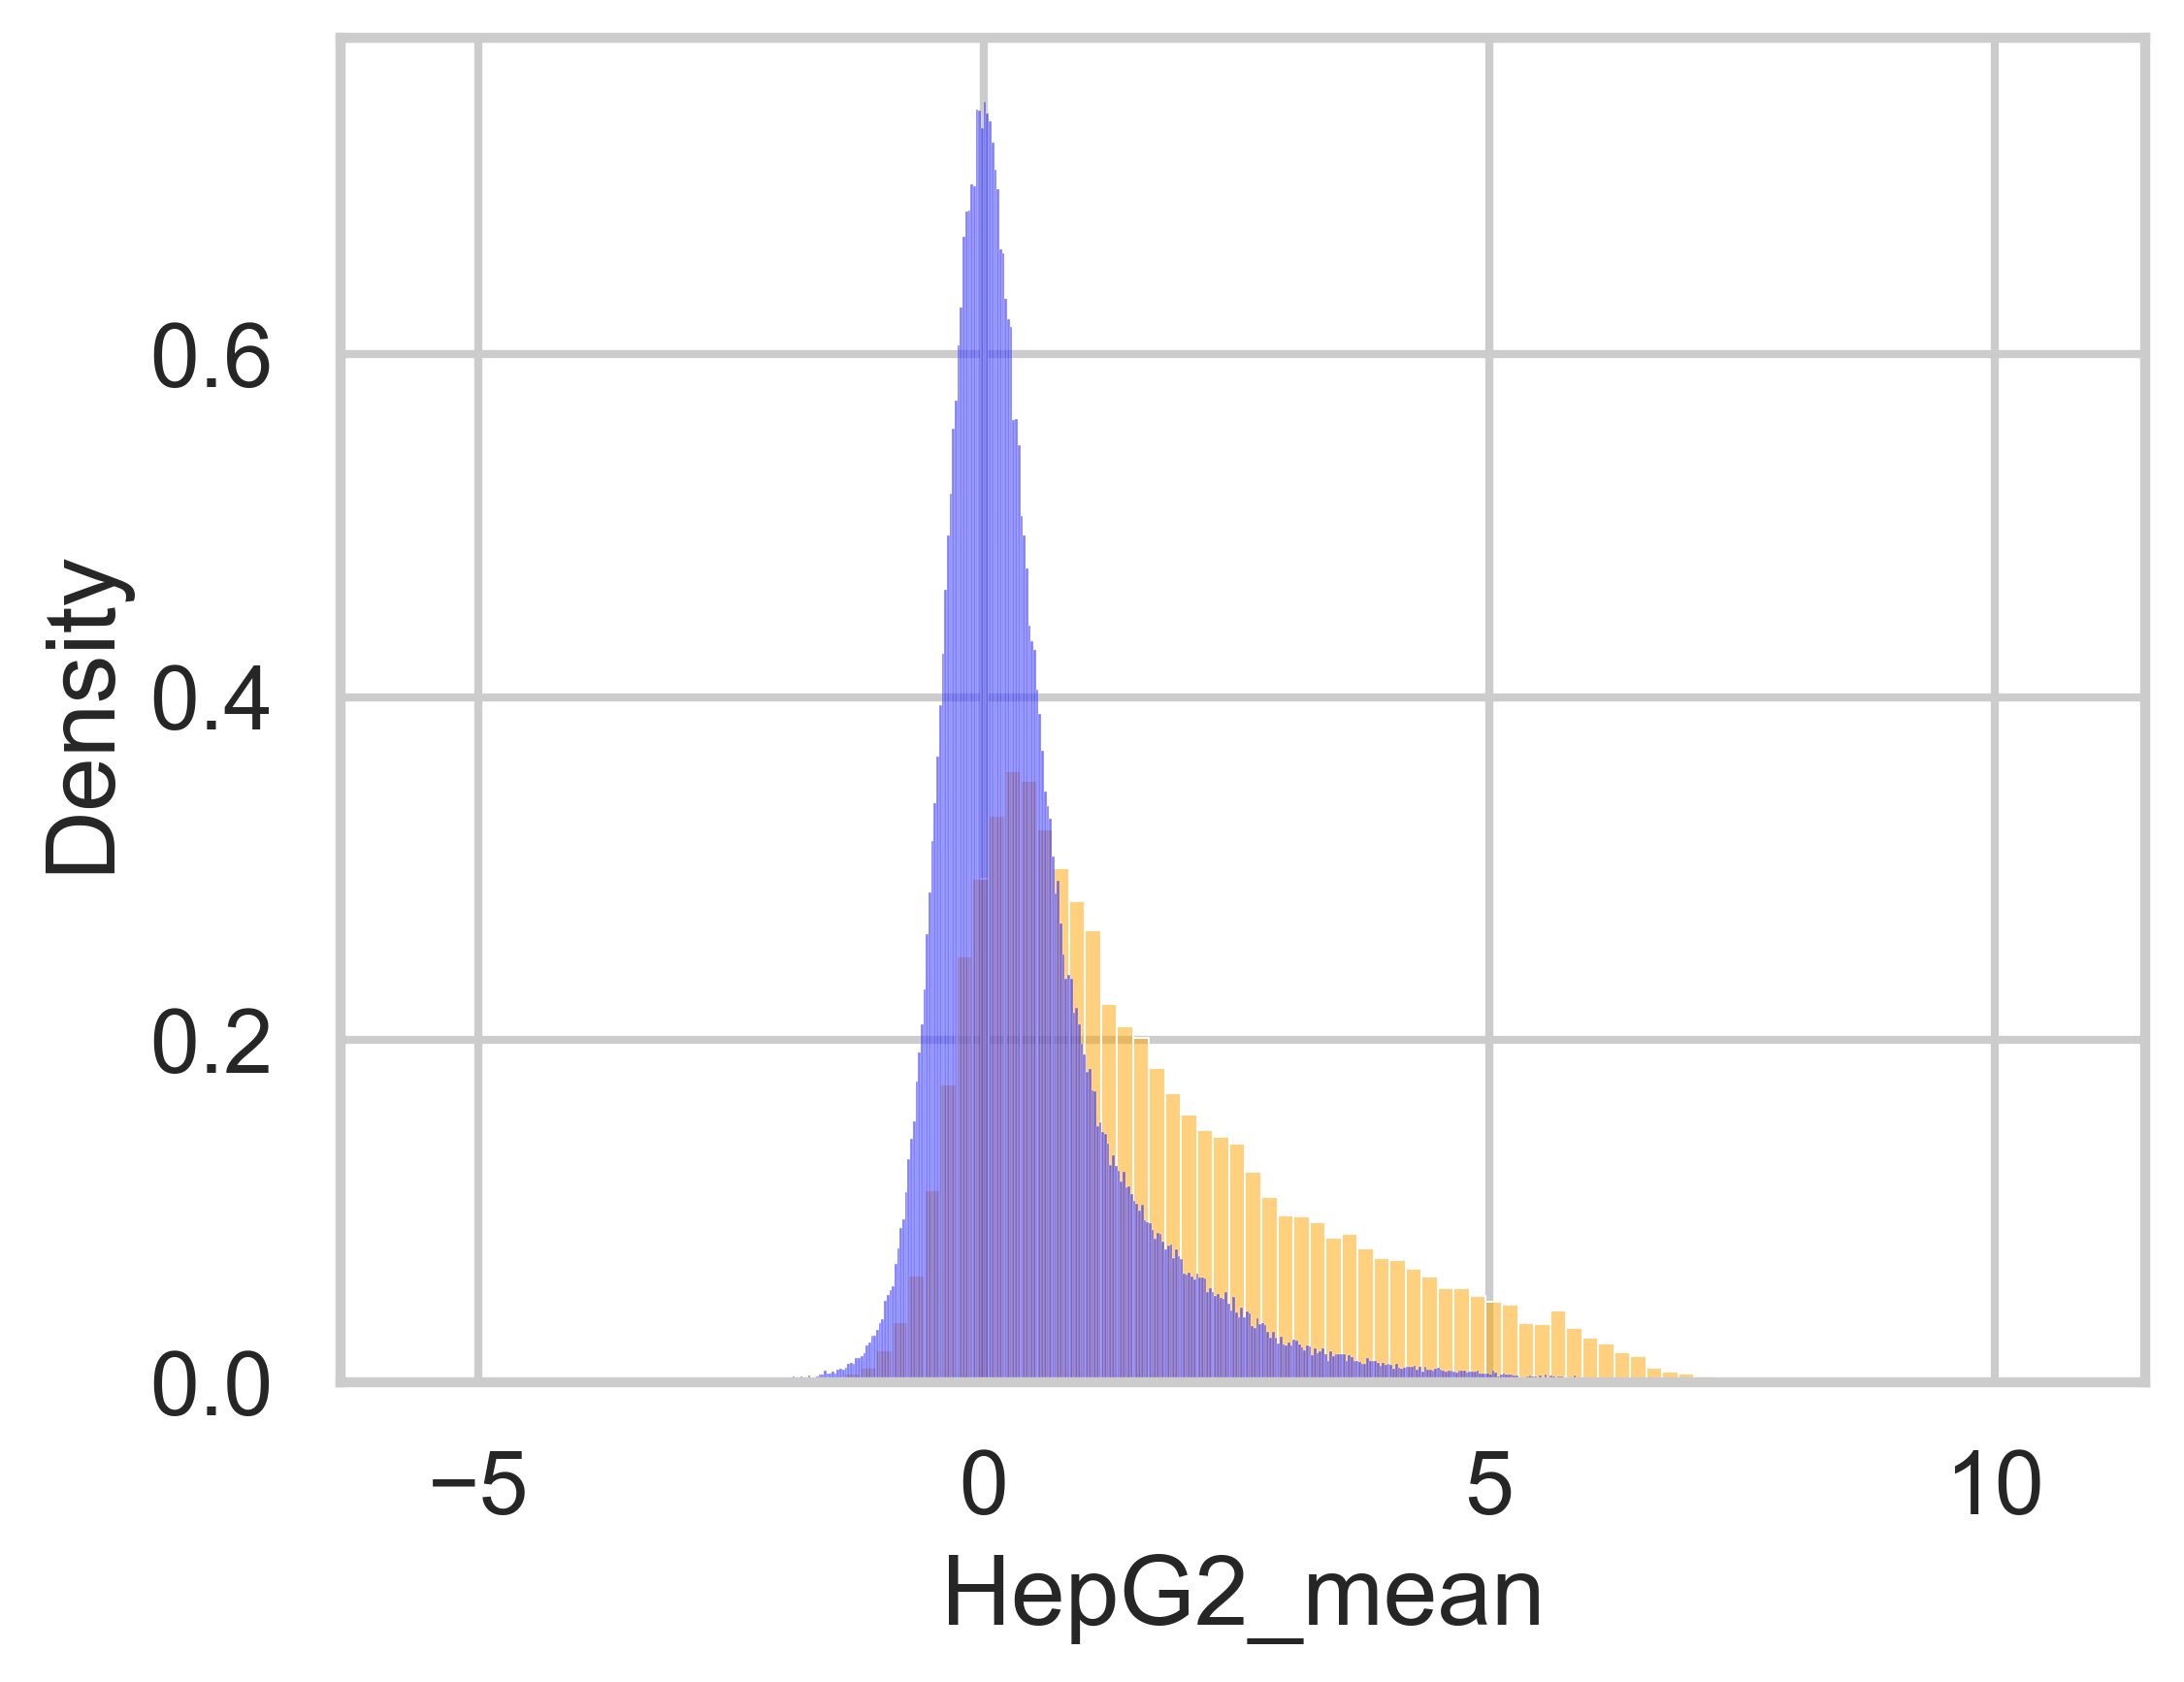

In [24]:
sns.histplot(HepG2_pos_MPRA_exp, stat='density', color='orange', alpha=0.5)
sns.histplot(HepG2_neg_MPRA_exp, stat='density', color='blue',   alpha=0.5)